##CSE-221710313011-D.Manasa

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

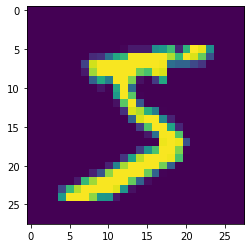

In [6]:
plt.imshow(train_digits[0])

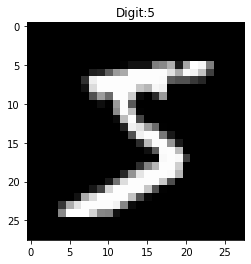

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

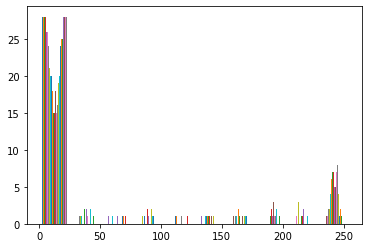

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([10327, 57131,  7788, 19359, 23445, 54571,  6649, 40214, 43174,
       37942, 17686, 28790, 50998, 39405, 28061, 48554])

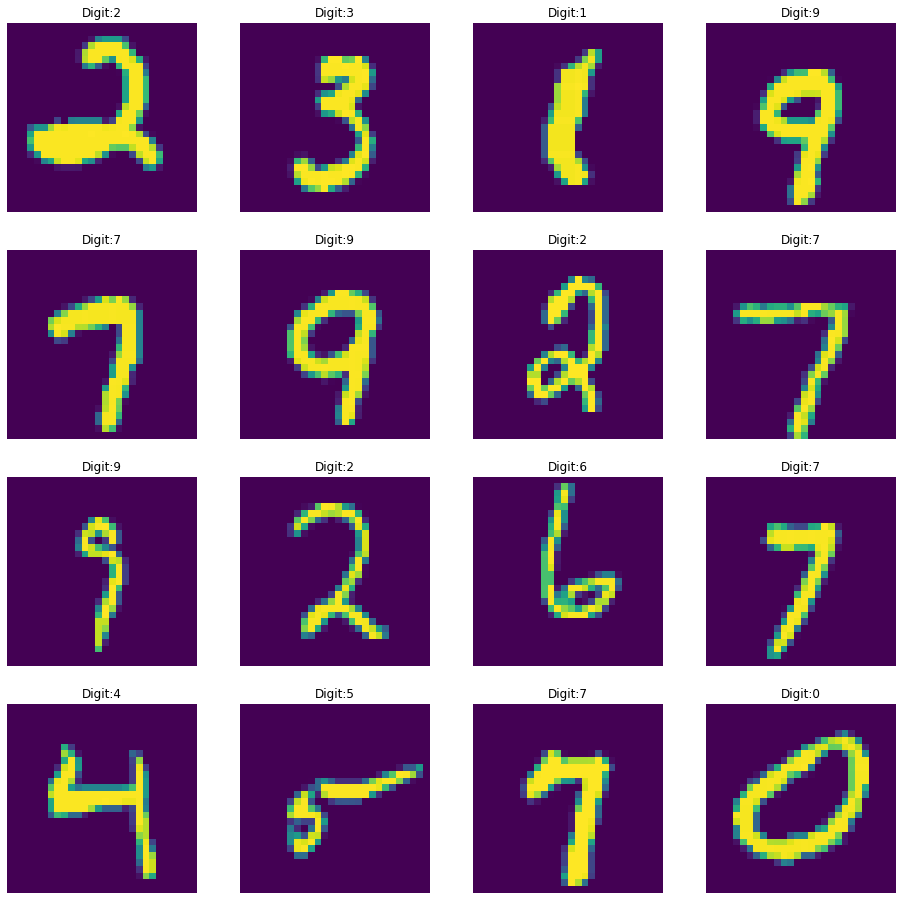

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 129us/step - loss: 0.2481 - accuracy: 0.9243 - val_loss: 0.1279 - val_accuracy: 0.9638
Epoch 2/5
54000/54000 [==============================] - 7s 124us/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0.1374 - val_accuracy: 0.9610
Epoch 3/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.1142 - val_accuracy: 0.9675
Epoch 4/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.0943 - val_accuracy: 0.9753
Epoch 5/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.0518 - accuracy: 0.9836 - val_loss: 0.1052 - val_accuracy: 0.9733


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.10101587304935675, 0.9729999899864197]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.0475098e-08, 1.2603958e-06, 2.3770543e-05, 2.7566175e-06,
        9.7547581e-10, 1.9598824e-08, 5.3389004e-10, 9.9996829e-01,
        7.4746805e-07, 3.1100160e-06]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[5.04751974e-08, 1.26039822e-06, 2.37705881e-05, 2.75662251e-06,
        9.75477699e-10, 1.95988239e-08, 5.33890043e-10, 9.99968290e-01,
        7.47469471e-07, 3.11002191e-06],
       [2.27079206e-12, 3.41373180e-07, 9.99999642e-01, 3.44450299e-08,
        1.39427402e-12, 4.93370733e-10, 2.00537614e-10, 4.81573537e-09,
        1.37038403e-09, 2.93912894e-15],
       [8.87435050e-08, 9.99983549e-01, 8.38392862e-06, 1.89406961e-08,
        8.43422683e-08, 4.25904005e-08, 8.62877698e-07, 2.93645599e-06,
        4.02266414e-06, 1.96106402e-08],
       [9.99998450e-01, 7.72287095e-11, 4.08813690e-07, 1.25167148e-08,
        2.23500564e-07, 2.92024737e-07, 2.26801191e-07, 1.86263520e-08,
        2.06228421e-08, 3.91071666e-07],
       [5.09271160e-07, 3.85827441e-08, 8.88865941e-07, 4.28465441e-09,
        9.99975801e-01, 7.10842869e-08, 2.85785859e-07, 2.49598333e-08,
        7.04113390e-08, 2.23049628e-05],
       [1.96057517e-08, 9.99997497e-01, 2.68568215e-07, 4.29206559e-10,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.0475098e-08, 1.2603958e-06, 2.3770543e-05, 2.7566175e-06,
        9.7547581e-10, 1.9598824e-08, 5.3389004e-10, 9.9996829e-01,
        7.4746805e-07, 3.1100160e-06]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.92433333, 0.96685183, 0.97564816, 0.97996294, 0.9836111],
 'loss': [0.24805080693201334,
  0.10752224000122536,
  0.07915735859592894,
  0.06265251108650463,
  0.05180423226424803],
 'val_accuracy': [0.9638333320617676,
  0.9610000252723694,
  0.9674999713897705,
  0.9753333330154419,
  0.9733333587646484],
 'val_loss': [0.1279459338610371,
  0.1373704410791397,
  0.11421892425914605,
  0.09426993807731196,
  0.10517284358277296]}

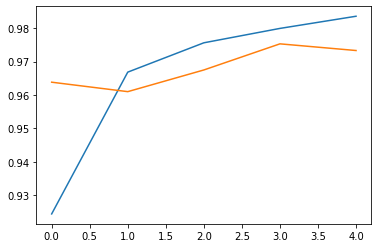

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 138us/step - loss: 0.2624 - accuracy: 0.9201 - val_loss: 0.1468 - val_accuracy: 0.9563
Epoch 2/5
54000/54000 [==============================] - 7s 127us/step - loss: 0.1127 - accuracy: 0.9663 - val_loss: 0.1043 - val_accuracy: 0.9695
Epoch 3/5
54000/54000 [==============================] - 7s 131us/step - loss: 0.0803 - accuracy: 0.9763 - val_loss: 0.1099 - val_accuracy: 0.9725
Epoch 4/5
54000/54000 [==============================] - 7s 127us/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.1173 - val_accuracy: 0.9692
Epoch 5/5
54000/54000 [==============================] - 7s 132us/step - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.1019 - val_accuracy: 0.9742


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.09051326593442355, 0.9746999740600586]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.0475098e-08, 1.2603958e-06, 2.3770543e-05, 2.7566175e-06,
        9.7547581e-10, 1.9598824e-08, 5.3389004e-10, 9.9996829e-01,
        7.4746805e-07, 3.1100160e-06]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[5.04751974e-08, 1.26039822e-06, 2.37705881e-05, 2.75662251e-06,
        9.75477699e-10, 1.95988239e-08, 5.33890043e-10, 9.99968290e-01,
        7.47469471e-07, 3.11002191e-06],
       [2.27079206e-12, 3.41373180e-07, 9.99999642e-01, 3.44450299e-08,
        1.39427402e-12, 4.93370733e-10, 2.00537614e-10, 4.81573537e-09,
        1.37038403e-09, 2.93912894e-15],
       [8.87435050e-08, 9.99983549e-01, 8.38392862e-06, 1.89406961e-08,
        8.43422683e-08, 4.25904005e-08, 8.62877698e-07, 2.93645599e-06,
        4.02266414e-06, 1.96106402e-08],
       [9.99998450e-01, 7.72287095e-11, 4.08813690e-07, 1.25167148e-08,
        2.23500564e-07, 2.92024737e-07, 2.26801191e-07, 1.86263520e-08,
        2.06228421e-08, 3.91071666e-07],
       [5.09271160e-07, 3.85827441e-08, 8.88865941e-07, 4.28465441e-09,
        9.99975801e-01, 7.10842869e-08, 2.85785859e-07, 2.49598333e-08,
        7.04113390e-08, 2.23049628e-05],
       [1.96057517e-08, 9.99997497e-01, 2.68568215e-07, 4.29206559e-10,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.0475098e-08, 1.2603958e-06, 2.3770543e-05, 2.7566175e-06,
        9.7547581e-10, 1.9598824e-08, 5.3389004e-10, 9.9996829e-01,
        7.4746805e-07, 3.1100160e-06]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.92005557, 0.9663148, 0.9763333, 0.98094445, 0.98403704],
 'loss': [0.26241733064833617,
  0.11269523692075853,
  0.0802537467200999,
  0.06259288280750452,
  0.052840369794190066],
 'val_accuracy': [0.956333339214325,
  0.9695000052452087,
  0.9725000262260437,
  0.9691666960716248,
  0.9741666913032532],
 'val_loss': [0.14679601957897345,
  0.10425256985674301,
  0.10987109886482357,
  0.11728032293481132,
  0.10194425885503491]}

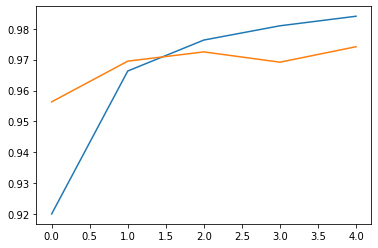

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])